<a href="https://colab.research.google.com/github/Abdul-Rahman258/ML_Practice/blob/main/Decision_Tree_And_Random_Forest_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None
              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
7

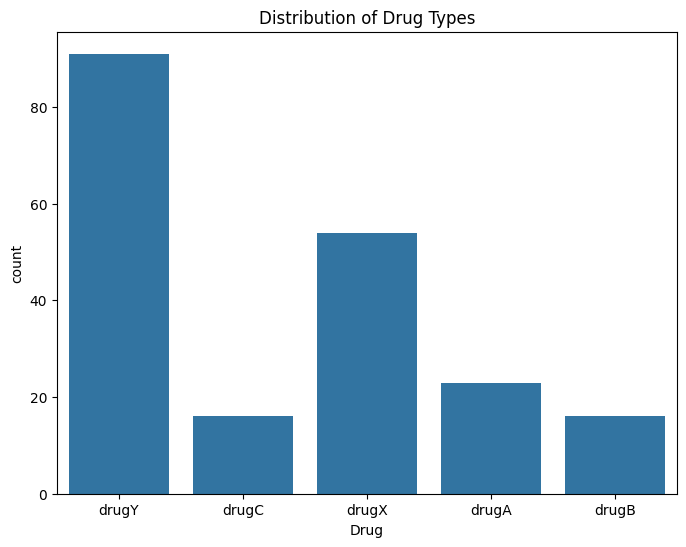

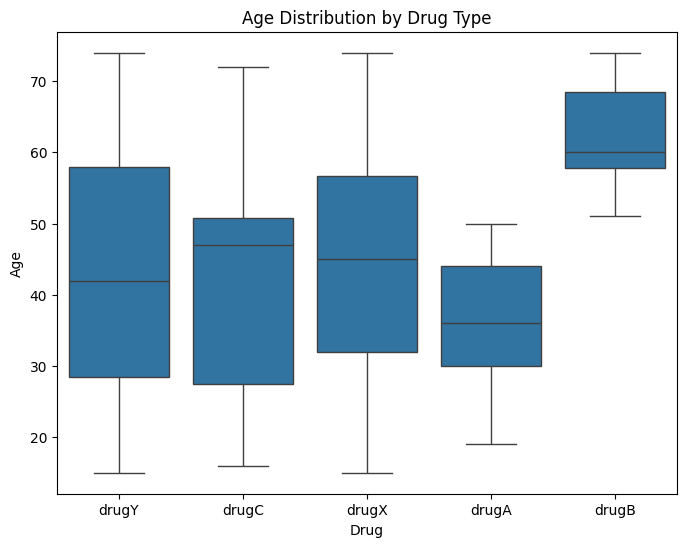

In [11]:
# prompt: load and analyze the drug200.csv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Install necessary libraries if not already installed
try:
    import pandas
except ImportError:
    !pip install pandas

try:
    import matplotlib
except ImportError:
    !pip install matplotlib

try:
    import seaborn
except ImportError:
    !pip install seaborn


# Load the dataset (replace 'drug200.csv' with the actual path if needed)
try:
  df = pd.read_csv('drug200.csv')
except FileNotFoundError:
  print("Error: drug200.csv not found. Please upload the file or provide the correct path.")
  df = None # Setting df to None to avoid further errors


if df is not None:
  # Display the first few rows of the dataset
  print(df.head())

  # Get some basic information about the dataset
  print(df.info())
  print(df.describe())

  # Check for missing values
  print(df.isnull().sum())

  # Analyze the distribution of the target variable (Drug)
  print(df['Drug'].value_counts())

  # Visualizations
  plt.figure(figsize=(8, 6))
  sns.countplot(x='Drug', data=df)
  plt.title('Distribution of Drug Types')
  plt.show()

  # Explore relationships between variables (example)
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='Drug', y='Age', data=df)
  plt.title('Age Distribution by Drug Type')
  plt.show()


  # More sophisticated analysis could be performed here, such as:
  # - Correlation analysis
  # - Feature importance analysis
  # - Model building (classification)
  # - ... and more!



In [12]:
# prompt: now train a decision tree model on it

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing

if df is not None:
    # Convert categorical features to numerical using Label Encoding
    le = preprocessing.LabelEncoder()
    for col in ['Sex', 'BP', 'Cholesterol', 'Drug']:
      df[col] = le.fit_transform(df[col])

    # Define features (X) and target variable (y)
    X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]  # Features
    y = df['Drug']  # Target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train a Decision Tree Classifier
    dt_classifier = DecisionTreeClassifier(random_state=42)  # You can tune hyperparameters here
    dt_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = dt_classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]


In [13]:
# prompt: now train a random forest model on the same data

from sklearn.ensemble import RandomForestClassifier

if df is not None:
    # ... (previous code remains the same)

    # Initialize and train a Random Forest Classifier
    rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)  # You can tune hyperparameters here
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_rf = rf_classifier.predict(X_test)

    # Evaluate the Random Forest model
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"\nRandom Forest Accuracy: {accuracy_rf}")
    print(classification_report(y_test, y_pred_rf))
    print(confusion_matrix(y_test, y_pred_rf))



Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]


In [14]:
# prompt: save both models

import pickle

# Assuming dt_classifier and rf_classifier are defined and trained as in the original code

# Save the Decision Tree model
filename_dt = 'decision_tree_model.sav'
pickle.dump(dt_classifier, open(filename_dt, 'wb'))

# Save the Random Forest model
filename_rf = 'random_forest_model.sav'
pickle.dump(rf_classifier, open(filename_rf, 'wb'))

print(f"Decision Tree model saved to {filename_dt}")
print(f"Random Forest model saved to {filename_rf}")


Decision Tree model saved to decision_tree_model.sav
Random Forest model saved to random_forest_model.sav
